In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import shapiro
from scipy.stats import kruskal
import scikit_posthocs as sp
from preprocess import preprocess_data #전처리 함수
import pingouin as pg
import prince
import re
from matplotlib.patches import Circle
# 한글 깨짐 방지 (Windows 기준)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False


C:\Users\User\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# 서부권역 파일 불러오기
trav_mas_seoul = pd.read_csv("../../data/seoul/trav_mas_Seoul.csv")
trav_mas_east= pd.read_csv("../../data/east/trav_mas_East.csv")
trav_mas_west= pd.read_csv("../../data/west/trav_mas_West.csv")
trav_mas_jeju= pd.read_csv("../../data/jeju/trav_mas_Jeju.csv")

va_info_seoul = pd.read_csv("../../data/seoul/va_info_Seoul.csv")
va_info_east = pd.read_csv("../../data/east/va_info_East.csv")
va_info_west = pd.read_csv("../../data/west/va_info_West.csv")
va_info_jeju = pd.read_csv("../../data/jeju/va_info_Jeju.csv")

trav_mas = pd.concat([trav_mas_east,trav_mas_jeju,trav_mas_seoul,trav_mas_west],axis=0, ignore_index=True)
va_info = pd.concat([va_info_east,va_info_jeju,va_info_seoul,va_info_west],axis=0, ignore_index=True)




C:\Users\User\AppData\Local\Temp\ipykernel_13428\211958496.py:8: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  va_info_east = pd.read_csv("../../data/east/va_info_East.csv")
C:\Users\User\AppData\Local\Temp\ipykernel_13428\211958496.py:9: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  va_info_west = pd.read_csv("../../data/west/va_info_West.csv")
C:\Users\User\AppData\Local\Temp\ipykernel_13428\211958496.py:10: DtypeWarning: Columns (8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  va_info_jeju = pd.read_csv("../../data/jeju/va_info_Jeju.csv")


In [3]:
va_info = va_info[['여행ID','진행순서','방문지명','POI명','방문지역유형코드','방문선택이유코드']]
va_info = va_info.sort_values(by= ['여행ID','진행순서']).reset_index(drop=True)
va_info['여행ID'].value_counts()

여행ID
d_d002701    77
d_d004817    77
d_d002283    73
d_d004100    67
d_d006312    63
             ..
c_c010873     1
a_a006559     1
c_c002746     1
c_c003218     1
c_c005665     1
Name: count, Length: 16000, dtype: int64

In [4]:
# 주관이 담긴 분류표 
df_theme=pd.read_csv('../../data/matrix/final_matrix.csv',index_col=0)
df_theme.index.name = '여행동기'
df_theme.loc['새로운 경험 추구', '기타'] = 1
df_theme

,숙소,자연관광지,상업지구 & 상점,역사/유적/종교시설,친구집,"테마시설(놀이공원, 와따파크)","산책로, 둘레길",체험 활동 관광지,"문화시설(공연장, 영화관, 전시관)",기타,"레저/스포츠 관련 시설(스키, 카트, 수상레저)",지역 축제/ 행사,사무실,식당/ 카페,"역, 터미널, 고속도로 휴게소",집
여행동기,,,,,,,,,,,,,,,,
"일상적인 환경 및 역할에서의 탈출, 지루함 탈피",1,1,1,0,0,1,1,1,1,0,1,1,0,1,1,1
여행 동반자와의 친밀감 및 유대감 증진,1,1,1,0,1,1,1,1,1,0,1,1,0,1,0,0
"쉴 수 있는 기회, 육체 피로 해결 및 정신적인 휴식",1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,1
새로운 경험 추구,1,1,1,1,0,1,0,1,1,1,1,1,0,1,1,0
"역사 탐방, 문화적 경험 등 교육적 동기",0,1,1,1,0,0,0,1,1,0,0,1,0,1,0,0
"운동, 건강 증진 및 충전",1,1,0,0,0,0,1,0,0,0,1,0,0,0,1,1
진정한 자아 찾기 또는 자신을 되돌아볼 기회 찾기,1,1,0,1,0,0,1,1,1,0,0,0,0,0,1,1
SNS 사진 등록 등 과시,1,1,1,0,0,1,0,1,1,0,1,1,0,1,0,0
"특별한 목적(칠순여행, 신혼여행, 수학여행, 인센티브여행)",1,1,1,1,0,1,0,1,1,0,1,1,0,1,1,0


In [5]:
trav_mas_df=trav_mas.sort_values(['여행ID']).reset_index(drop=True)
trav_mas_df=trav_mas_df[['여행ID','여행동기1','여행동행_유형','연령대']]
trav_mas_df['여행ID']=trav_mas_df['여행ID'].str[0] + '_' + trav_mas_df['여행ID']
trav_mas_df = trav_mas_df[trav_mas_df["여행동기1"] != "기타"]

In [6]:
# 만약 df_theme의 index가 여행동기라면 index → 열로 이동
df_theme = df_theme.reset_index()  # or df_theme.rename_axis('여행동기_1').reset_index()
df_theme
# 병합
merged = pd.merge(trav_mas_df, df_theme, how='left', left_on='여행동기1', right_on='여행동기')
merged = merged.drop(columns=['여행동기'])
merged[merged.isnull().any(axis=1)].head()

,여행ID,여행동기1,여행동행_유형,연령대,숙소,자연관광지,상업지구 & 상점,역사/유적/종교시설,친구집,"테마시설(놀이공원, 와따파크)","산책로, 둘레길",체험 활동 관광지,"문화시설(공연장, 영화관, 전시관)",기타,"레저/스포츠 관련 시설(스키, 카트, 수상레저)",지역 축제/ 행사,사무실,식당/ 카페,"역, 터미널, 고속도로 휴게소",집
10851,c_c012262,NaN,3인 이상 여행(가족 외),20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
merged = merged.rename(columns = {'테마시설(놀이공원, 와따파크)':'테마시설(놀이공원, 워터파크)'})

In [8]:
col_rename_map = {
    '문화시설(공연장, 영화관, 전시관)': '문화 시설(공연장, 영화관, 전시관 등)',
    '산책로, 둘레길': '산책로, 둘레길 등',
    '상업지구 & 상점': '상업지구(거리, 시장, 쇼핑시설)',
    '식당/ 카페': '식당/카페',
    '역사/유적/종교시설': '역사/유적/종교 시설(문화재, 박물관, 촬영지, 절 등)',
    '친구집': '친구/친지집',
    '지역 축제/ 행사':'지역 축제/행사'
}
merged= merged.rename(columns=col_rename_map)
merged

,여행ID,여행동기1,여행동행_유형,연령대,숙소,자연관광지,"상업지구(거리, 시장, 쇼핑시설)","역사/유적/종교 시설(문화재, 박물관, 촬영지, 절 등)",친구/친지집,"테마시설(놀이공원, 워터파크)","산책로, 둘레길 등",체험 활동 관광지,"문화 시설(공연장, 영화관, 전시관 등)",기타,"레저/스포츠 관련 시설(스키, 카트, 수상레저)",지역 축제/행사,사무실,식당/카페,"역, 터미널, 고속도로 휴게소",집
0,a_a000007,"일상적인 환경 및 역할에서의 탈출, 지루함 탈피",3대 동반 여행(친척 포함),30,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
1,a_a000011,여행 동반자와의 친밀감 및 유대감 증진,3대 동반 여행(친척 포함),20,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
2,a_a000012,"역사 탐방, 문화적 경험 등 교육적 동기",나홀로 여행,30,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,a_a000013,여행 동반자와의 친밀감 및 유대감 증진,3인 이상 여행(가족 외),30,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
4,a_a000016,새로운 경험 추구,나홀로 여행,30,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14189,d_d012488,"쉴 수 있는 기회, 육체 피로 해결 및 정신적인 휴식",나홀로 여행,20,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
14190,d_d012489,"운동, 건강 증진 및 충전",나홀로 여행,30,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
14191,d_d012490,"일상적인 환경 및 역할에서의 탈출, 지루함 탈피",나홀로 여행,20,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
14192,d_d012491,새로운 경험 추구,2인 가족 여행,30,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0


In [9]:
va_info_sum = pd.pivot_table(va_info,
    index='여행ID',
    columns='방문지역유형코드',
    aggfunc='size',
    fill_value=0)
va_info_sum = va_info_sum.applymap(lambda x: 1 if x> 0 else 0)
va_info_sum[va_info_sum['집']==0]

C:\Users\User\AppData\Local\Temp\ipykernel_13428\4129647623.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  va_info_sum = va_info_sum.applymap(lambda x: 1 if x> 0 else 0)


방문지역유형코드,기타,"레저/스포츠 관련 시설(스키, 카트, 수상레저)","문화 시설(공연장, 영화관, 전시관 등)",사무실,"산책로, 둘레길 등","상업지구(거리, 시장, 쇼핑시설)",상점,숙소,식당/카페,"역, 터미널, 고속도로 휴게소","역사/유적/종교 시설(문화재, 박물관, 촬영지, 절 등)",자연관광지,지역 축제/행사,집,체험 활동 관광지,친구/친지집,"테마시설(놀이공원, 워터파크)"
여행ID,,,,,,,,,,,,,,,,,
a_a000108,0,0,0,1,1,1,0,1,1,0,1,0,0,0,0,0,0
a_a000142,0,0,1,0,0,1,0,1,1,0,0,1,0,0,0,1,1
a_a000181,0,0,1,0,0,0,1,1,1,0,1,0,0,0,0,0,0
a_a000182,0,0,1,0,0,1,0,1,1,1,1,0,0,0,1,1,0
a_a000186,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
d_d012349,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,0,0
d_d012354,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0
d_d012405,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1


In [10]:
va_info['방문여부']=1
visit_matrix = va_info.pivot_table(index='여행ID',columns = '방문지역유형코드',values='방문여부',aggfunc='max',fill_value=0).reset_index()
visit_matrix.columns.name = None
visit_matrix['상업지구(거리, 시장, 쇼핑시설)'] = visit_matrix[['상업지구(거리, 시장, 쇼핑시설)', '상점']].max(axis=1)

# 2. 원래 컬럼 제거
visit_matrix = visit_matrix.drop(columns=['상점'], errors='ignore')

In [11]:
# 1. 비교할 지역유형 컬럼 추출
compare_cols = [col for col in visit_matrix.columns if col != '여행ID']

# 2. visit_matrix: 실제 방문 기록
real_df = visit_matrix.set_index('여행ID')[compare_cols].copy()

# 3. merged: 주관적 예측 데이터
# 여행동기 컬럼 제외하고 비교 대상만 추출
pred_df = merged.set_index('여행ID')[compare_cols].copy()

# 4. 공통 인덱스 및 컬럼으로 정렬 및 정제
common_ids = real_df.index.intersection(pred_df.index)
common_cols = real_df.columns.intersection(pred_df.columns)

real_df_aligned = real_df.loc[common_ids, common_cols].sort_index().sort_index(axis=1)
pred_df_aligned = pred_df.loc[common_ids, common_cols].sort_index().sort_index(axis=1)

# 5. 불일치 개수 및 비율 계산
mismatch = (real_df_aligned != pred_df_aligned).sum(axis=1)
total_cols = len(common_cols)

result = pd.DataFrame({
    '여행ID': real_df_aligned.index,
    '불일치율': mismatch / total_cols
}).reset_index(drop=True)

# 6. 여행동기 정보 붙이기
result = result.merge(merged[['여행ID', '여행동기1']], on='여행ID', how='left')

# 결과 확인
result


,여행ID,불일치율,여행동기1
0,a_a000007,0.5000,"일상적인 환경 및 역할에서의 탈출, 지루함 탈피"
1,a_a000011,0.6250,여행 동반자와의 친밀감 및 유대감 증진
2,a_a000012,0.3750,"역사 탐방, 문화적 경험 등 교육적 동기"
3,a_a000013,0.5625,여행 동반자와의 친밀감 및 유대감 증진
4,a_a000016,0.5625,새로운 경험 추구
...,...,...,...
14189,d_d012488,0.6250,"쉴 수 있는 기회, 육체 피로 해결 및 정신적인 휴식"
14190,d_d012489,0.4375,"운동, 건강 증진 및 충전"
14191,d_d012490,0.6250,"일상적인 환경 및 역할에서의 탈출, 지루함 탈피"
14192,d_d012491,0.6250,새로운 경험 추구


In [12]:
# 방문순서 오름차순 정렬
va_info_sorted = va_info.sort_values(['여행ID', '진행순서'])

# 각 여행ID별 첫/마지막 행의 인덱스
first_idx = va_info_sorted.groupby('여행ID').head(1).index
last_idx = va_info_sorted.groupby('여행ID').tail(1).index

# 첫/마지막 인덱스 중에서 '집' 또는 '친구/친지집'인 것만 추출
to_remove_idx = va_info_sorted.loc[
    first_idx.union(last_idx),
    :
].query("방문지역유형코드 in ['집', '친구/친지집']").index

# 해당 행만 제거
va_info_cleaned = va_info_sorted.drop(index=to_remove_idx).copy()
# 비교 대상 컬럼 (여행ID 제외)
compare_cols = [col for col in visit_matrix.columns if col != '여행ID']

real_df = visit_matrix.set_index('여행ID')[compare_cols]
pred_df = merged.set_index('여행ID')[compare_cols]

# 공통 여행ID, 컬럼 정렬
common_ids = real_df.index.intersection(pred_df.index)
common_cols = real_df.columns.intersection(pred_df.columns)

real_df = real_df.loc[common_ids, common_cols].sort_index().sort_index(axis=1)
pred_df = pred_df.loc[common_ids, common_cols].sort_index().sort_index(axis=1)

# 불일치율 계산
mismatch = (real_df != pred_df).sum(axis=1)
result_refined = pd.DataFrame({
    '여행ID': real_df.index,
    '불일치율_filltered': mismatch / len(common_cols)
}).reset_index(drop=True)

# 여행동기 추가
result_refined = result_refined.merge(merged[['여행ID', '여행동기1']], on='여행ID', how='left')
result_refined

,여행ID,불일치율_filltered,여행동기1
0,a_a000007,0.5000,"일상적인 환경 및 역할에서의 탈출, 지루함 탈피"
1,a_a000011,0.6250,여행 동반자와의 친밀감 및 유대감 증진
2,a_a000012,0.3750,"역사 탐방, 문화적 경험 등 교육적 동기"
3,a_a000013,0.5625,여행 동반자와의 친밀감 및 유대감 증진
4,a_a000016,0.5625,새로운 경험 추구
...,...,...,...
14189,d_d012488,0.6250,"쉴 수 있는 기회, 육체 피로 해결 및 정신적인 휴식"
14190,d_d012489,0.4375,"운동, 건강 증진 및 충전"
14191,d_d012490,0.6250,"일상적인 환경 및 역할에서의 탈출, 지루함 탈피"
14192,d_d012491,0.6250,새로운 경험 추구


In [13]:
result.describe()

,불일치율
count,14194.000000
mean,0.467425
std,0.141425
min,0.062500
25%,0.375000
50%,0.500000
75%,0.562500
max,1.000000


In [14]:
result_refined.describe()

,불일치율_filltered
count,14194.000000
mean,0.467425
std,0.141425
min,0.062500
25%,0.375000
50%,0.500000
75%,0.562500
max,1.000000


In [15]:
diff = (result['불일치율'] - result_refined['불일치율_filltered']).abs()
print("변화가 있는 여행ID 수:", (diff > 1e-6).sum())
'''
“집” 방문지 제거 유무에 따른 민감도 분석 결과, 불일치율에 유의한 차이는 나타나지 않았다.
이는 집 방문이 불일치율 계산에 포함되지 않거나, 포함되어도 시작/종착지로 일관된 위치에 있어 비교 대상에서 제외되는 방식 때문인 것으로 보인다.
따라서 본 분석에서는 “집” 방문지는 제외하는 방식으로 일관되게 처리하였다.”
'''

변화가 있는 여행ID 수: 0


'\n“집” 방문지 제거 유무에 따른 민감도 분석 결과, 불일치율에 유의한 차이는 나타나지 않았다.\n이는 집 방문이 불일치율 계산에 포함되지 않거나, 포함되어도 시작/종착지로 일관된 위치에 있어 비교 대상에서 제외되는 방식 때문인 것으로 보인다.\n따라서 본 분석에서는 “집” 방문지는 제외하는 방식으로 일관되게 처리하였다.”\n'

In [16]:
trav_mas_df['불일치율'] = result['불일치율']
trav_mas_df.dropna(inplace=True)
trav_mas_df.to_csv("../../data/global/불일치율_분석결과.csv", index=False, encoding='utf-8-sig')

In [17]:
trav_mas_df = pd.read_csv('../../data/global/불일치율_분석결과.csv')
trav_mas_df

,여행ID,여행동기1,여행동행_유형,연령대,불일치율
0,a_a000007,"일상적인 환경 및 역할에서의 탈출, 지루함 탈피",3대 동반 여행(친척 포함),30,0.5000
1,a_a000011,여행 동반자와의 친밀감 및 유대감 증진,3대 동반 여행(친척 포함),20,0.6250
2,a_a000012,"역사 탐방, 문화적 경험 등 교육적 동기",나홀로 여행,30,0.3750
3,a_a000013,여행 동반자와의 친밀감 및 유대감 증진,3인 이상 여행(가족 외),30,0.5625
4,a_a000016,새로운 경험 추구,나홀로 여행,30,0.3750
...,...,...,...,...,...
13982,d_d010533,"쉴 수 있는 기회, 육체 피로 해결 및 정신적인 휴식",나홀로 여행,20,0.6250
13983,d_d010534,"쉴 수 있는 기회, 육체 피로 해결 및 정신적인 휴식",2인 여행(가족 외),20,0.4375
13984,d_d010548,"일상적인 환경 및 역할에서의 탈출, 지루함 탈피",나홀로 여행,30,0.6250
13985,d_d010551,"운동, 건강 증진 및 충전",부모 동반 여행,30,0.6250


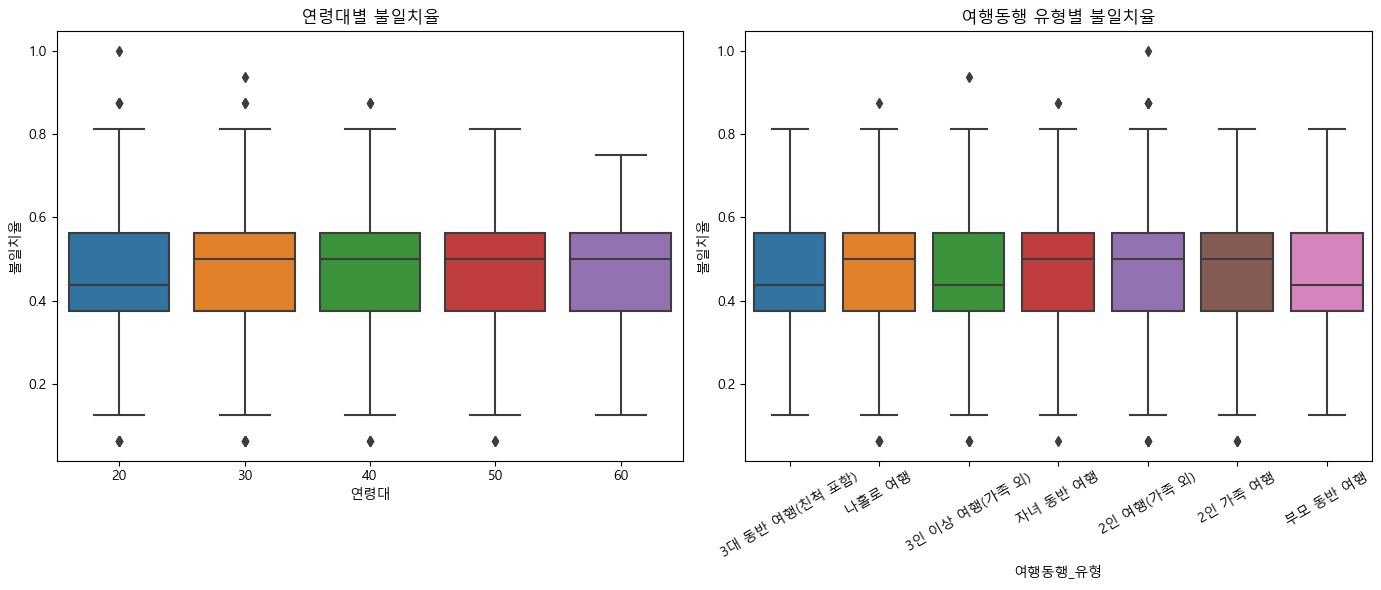

In [18]:
# 그림 틀 설정
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# 연령대별 불일치율
sns.boxplot(data=trav_mas_df, x='연령대', y='불일치율', ax=axes[0])
axes[0].set_title('연령대별 불일치율')

# 여행동행 유형별 불일치율
sns.boxplot(data=trav_mas_df, x='여행동행_유형', y='불일치율', ax=axes[1])
axes[1].set_title('여행동행 유형별 불일치율')
axes[1].tick_params(axis='x', rotation=30)  # 라벨 기울이기

plt.tight_layout()
plt.show()

In [19]:
import numpy as np
import pandas as pd
from scipy import stats

# 결과 저장용
results = []

# 연령대별 정규성 검정 (Anderson–Darling, 정규분포 가정)
for name, group in trav_mas_df.groupby('연령대', dropna=False):
    x = group['불일치율'].dropna().values
    n = x.size

    if n < 3:  # 표본 너무 작으면 판정 보류
        results.append((name, n, np.nan, np.nan, '샘플부족'))
        continue

    ad = stats.anderson(x, dist='norm')
    ad_stat = ad.statistic
    crit = ad.critical_values          # [15%, 10%, 5%, 2.5%, 1%]
    sigs = ad.significance_level       # [15., 10., 5., 2.5, 1.]

    # 5% 기준(인덱스 2)으로 판정
    crit_5 = crit[2]
    decision = '정규성 만족' if ad_stat <= crit_5 else '위반'

    results.append((name, n, ad_stat, crit_5, decision))

# 결과 보기
result_df = pd.DataFrame(results, columns=['연령대', '샘플 수', 'AD 통계량', 'AD 임계(5%)', '정규성 여부'])
result_df = result_df.sort_values(by='연령대')
result_df

,연령대,샘플 수,AD 통계량,AD 임계(5%),정규성 여부
0,20,5109,47.026785,0.786,위반
1,30,5175,47.779529,0.786,위반
2,40,2380,22.410820,0.786,위반
3,50,922,9.282821,0.784,위반
4,60,401,5.120190,0.779,위반


In [20]:
import numpy as np
import pandas as pd
from scipy import stats

# 결과 저장용
results = []

# 연령대별 정규성 검정 (Anderson–Darling, 정규분포 가정)
for name, group in trav_mas_df.groupby('여행동행_유형', dropna=False):
    x = group['불일치율'].dropna().values
    n = x.size

    if n < 3:  # 표본 너무 작으면 판정 보류
        results.append((name, n, np.nan, np.nan, '샘플부족'))
        continue

    ad = stats.anderson(x, dist='norm')
    ad_stat = ad.statistic
    crit = ad.critical_values          # [15%, 10%, 5%, 2.5%, 1%]
    sigs = ad.significance_level       # [15., 10., 5., 2.5, 1.]

    # 5% 기준(인덱스 2)으로 판정
    crit_5 = crit[2]
    decision = '정규성 만족' if ad_stat <= crit_5 else '위반'

    results.append((name, n, ad_stat, crit_5, decision))

# 결과 보기
result_df = pd.DataFrame(results, columns=['여행동행_유형', '샘플 수', 'AD 통계량', 'AD 임계(5%)', '정규성 여부'])
result_df = result_df.sort_values(by='여행동행_유형')
result_df

,여행동행_유형,샘플 수,AD 통계량,AD 임계(5%),정규성 여부
0,2인 가족 여행,1212,11.150305,0.784,위반
1,2인 여행(가족 외),3934,37.315462,0.786,위반
2,3대 동반 여행(친척 포함),328,3.518032,0.778,위반
3,3인 이상 여행(가족 외),1818,16.631822,0.785,위반
4,나홀로 여행,4165,38.949843,0.786,위반
5,부모 동반 여행,602,5.906204,0.782,위반
6,자녀 동반 여행,1928,20.093518,0.785,위반


In [21]:
# 귀무가설(H0): 연령대 간 불일치율의 분포에 차이가 없다.

# 그룹별 데이터 준비 (연령대별 불일치율)
groups = [group["불일치율"].values for name, group in trav_mas_df.groupby("연령대")]

# Kruskal-Wallis H-test 수행
stat, p = kruskal(*groups)

# 결과 출력
print(f"연령대별 Kruskal-Wallis 결과: H={stat:.3f}, p={p:.3f}")

연령대별 Kruskal-Wallis 결과: H=12.402, p=0.015


In [22]:
#  귀무가설(H0): 여행동행_유형 간 불일치율의 분포에 차이가 없다.

# 그룹별 데이터 준비 (여행동행_유형 불일치율)
groups = [group["불일치율"].values for name, group in trav_mas_df.groupby("여행동행_유형")]

# Kruskal-Wallis H-test 수행
stat, p = kruskal(*groups)

# 결과 출력
print(f"여행동행_유형 Kruskal-Wallis 결과: H={stat:.3f}, p={p:.3f}")


여행동행_유형 Kruskal-Wallis 결과: H=9.806, p=0.133


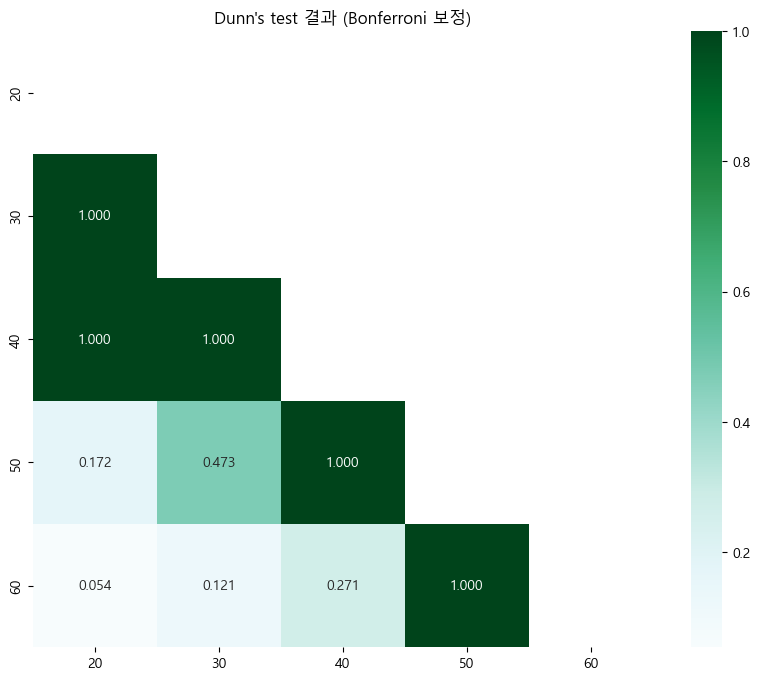

In [23]:
# 사후 검정 (보수적인 분석방법)
import scikit_posthocs as sp
import pandas as pd

# Dunn’s test (Bonferroni 보정 포함)
dunn_result = sp.posthoc_dunn(trav_mas_df, val_col='불일치율', group_col='연령대', p_adjust='bonferroni')
mask = np.triu(np.ones_like(dunn_result, dtype=bool))
# 결과 확인
plt.figure(figsize=(10, 8))
sns.heatmap(dunn_result,mask=mask ,annot=True, cmap='BuGn', fmt=".3f")
plt.title("Dunn's test 결과 (Bonferroni 보정)")
plt.show()

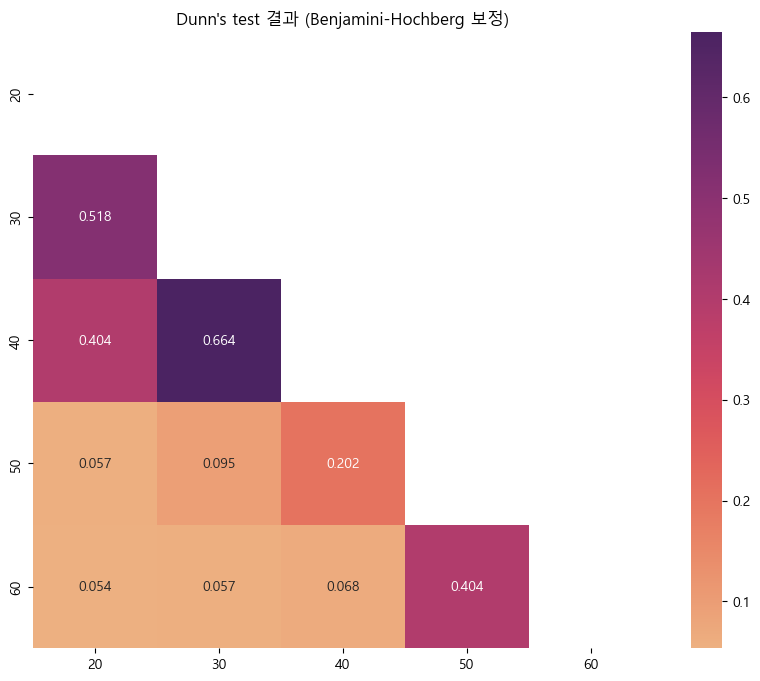

In [24]:
# Dunn’s test (탐색적 분석)
dunn_result = sp.posthoc_dunn(trav_mas_df, val_col='불일치율', group_col='연령대', p_adjust='fdr_bh')

plt.figure(figsize=(10, 8))
sns.heatmap(dunn_result,mask=mask, annot=True, cmap='flare', fmt=".3f")
plt.title("Dunn's test 결과 (Benjamini-Hochberg 보정)")
plt.show()

  Source  ddof1        ddof2         F     p-unc       np2
0    연령대      4  2138.803575  3.185992  0.012772  0.000878
    A   B      diff      pval
3  20  60 -0.020520  0.031461
6  30  60 -0.018405  0.071183
8  40  60 -0.017623  0.118760
2  20  50 -0.011987  0.129950
5  30  50 -0.009872  0.298906
7  40  50 -0.009091  0.464827
9  50  60 -0.008532  0.839669
1  20  40 -0.002897  0.920912
0  20  30 -0.002115  0.943080
4  30  40 -0.000781  0.999440


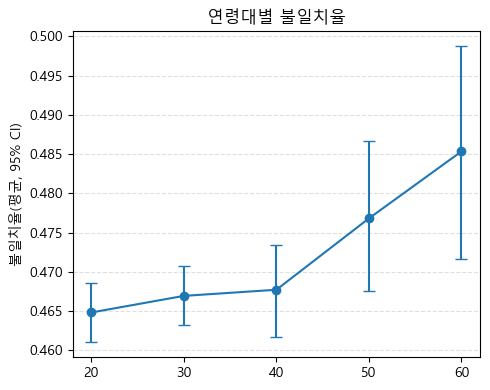

In [25]:
df = trav_mas_df[['연령대','불일치율']].dropna().copy()
df['연령대'] = df['연령대'].astype(str)

# Welch ANOVA
print(pg.welch_anova(data=df, dv='불일치율', between='연령대'))
print('====================================================')
# Games–Howell 사후
gh = pg.pairwise_gameshowell(data=df, dv='불일치율', between='연령대')
print(gh[['A','B','diff','pval']].sort_values('pval').head(10))
print('====================================================')
# 평균±95% CI (부트스트랩)
def mean_ci_boot(x, B=2000):
    rng = np.random.default_rng(42)
    boots = np.array([rng.choice(x, size=len(x), replace=True).mean() for _ in range(B)])
    return x.mean(), np.percentile(boots,[2.5,97.5])

order = sorted(df['연령대'].unique(), key=lambda s:int(''.join(filter(str.isdigit,s))))
vals = [df.loc[df['연령대']==g,'불일치율'].values for g in order]

means, lo, hi = [], [], []
for x in vals:
    m,(l,h)=mean_ci_boot(x); means.append(m); lo.append(l); hi.append(h)

xi = np.arange(len(order))
yerr = [np.array(means)-np.array(lo), np.array(hi)-np.array(means)]
plt.figure(figsize=(1.0*len(order),4))
plt.errorbar(xi, means, yerr=yerr, fmt='o-', capsize=4)
plt.xticks(xi, order); plt.ylabel('불일치율(평균, 95% CI)')
plt.title('연령대별 불일치율')
plt.grid(axis='y', ls='--', alpha=0.4)
plt.tight_layout(); plt.show()


    Source  ddof1        ddof2         F     p-unc       np2
0  여행동행_유형      6  2595.628166  1.602928  0.142199  0.000664
                 A                B      diff      pval
20        부모 동반 여행         자녀 동반 여행 -0.015214  0.216779
4         2인 가족 여행         부모 동반 여행  0.015965  0.248880
18          나홀로 여행         부모 동반 여행  0.012466  0.365452
17  3인 이상 여행(가족 외)         자녀 동반 여행 -0.008531  0.494673
2         2인 가족 여행   3인 이상 여행(가족 외)  0.009282  0.571125
9      2인 여행(가족 외)         부모 동반 여행  0.010568  0.580289
15  3인 이상 여행(가족 외)           나홀로 여행 -0.005783  0.748529
10     2인 여행(가족 외)         자녀 동반 여행 -0.004646  0.904328
0         2인 가족 여행      2인 여행(가족 외)  0.005397  0.917898
1         2인 가족 여행  3대 동반 여행(친척 포함)  0.009223  0.937350


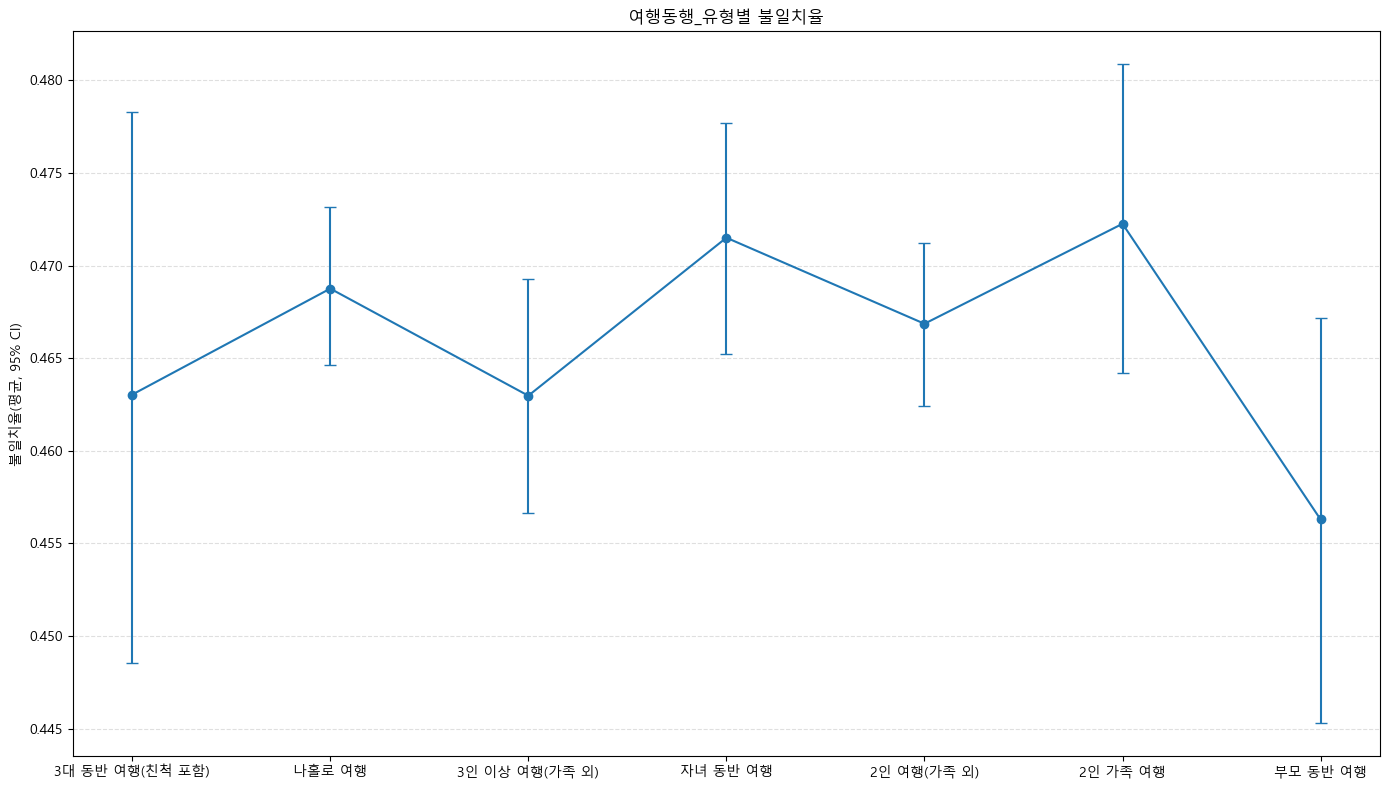

In [31]:
df = trav_mas_df[['여행동행_유형','불일치율']].dropna().copy()
df['여행동행_유형'] = df['여행동행_유형'].astype(str)

# Welch ANOVA
print(pg.welch_anova(data=df, dv='불일치율', between='여행동행_유형'))
print('====================================================')
# Games–Howell 사후
gh = pg.pairwise_gameshowell(data=df, dv='불일치율', between='여행동행_유형')
print(gh[['A','B','diff','pval']].sort_values('pval').head(10))
print('====================================================')
# 평균±95% CI (부트스트랩)
def mean_ci_boot(x, B=2000):
    rng = np.random.default_rng(42)
    boots = np.array([rng.choice(x, size=len(x), replace=True).mean() for _ in range(B)])
    return x.mean(), np.percentile(boots,[2.5,97.5])

desired = ['나홀로', '연인', '부모 동반', '가족(자녀)', '친구/지인', '동호회/모임', '단체/회사', '기타']
uniq = list(df['여행동행_유형'].astype(str).unique())

order = [g for g in desired if g in uniq] + [g for g in uniq if g not in desired]
vals = [df.loc[df['여행동행_유형']==g,'불일치율'].values for g in order]

means, lo, hi = [], [], []
for x in vals:
    m,(l,h)=mean_ci_boot(x); means.append(m); lo.append(l); hi.append(h)

xi = np.arange(len(order))
yerr = [np.array(means)-np.array(lo), np.array(hi)-np.array(means)]
plt.figure(figsize=(2.0*len(order),8))
plt.errorbar(xi, means, yerr=yerr, fmt='o-', capsize=4)
plt.xticks(xi, order); plt.ylabel('불일치율(평균, 95% CI)')
plt.title('여행동행_유형별 불일치율')
plt.grid(axis='y', ls='--', alpha=0.4)
plt.tight_layout(); plt.show()


<h1>강건성 검증: 같은 질문에 대해 다른 분석 방법 또는 가정 변경을 적용해도 결론이 유지되는지 점검하는 절차.
목적은 결과의 신뢰성과 재현성을 높이는 것.</h1>

| 변수         | Welch ANOVA 결과 (사후: Games–Howell)                                                          | Kruskal–Wallis 결과 (사후: Dunn)                            | 결론                                                     |
| ---------- | ------------------------------------------------------------------------------------------ | ------------------------------------------------------- | ------------------------------------------------------ |
| **연령대**    | 전체: F(4, 2138.80) = 3.186, p = 0.0128<br>**유의 쌍**: 20대 – 60대 (diff = -0.02052, p = 0.0315) | 전체: H = 12.402, p = 0.015<br>사후: 모든 쌍 비유의 (최소 p = 0.54) | 평균 비교(Welch)에서는 20–60대 차이 유의, 순위 비교(K–W)에서는 특정 쌍 유의 아님 |
| **여행동행유형** | 전체: F(6, 2595.63) = 1.603, p = 0.142<br>사후: 모든 쌍 비유의                                       | 전체: H = 9.806, p = 0.133           | 두 방법 모두 유의성 없음                                         |


<h1>요인 분석 (MCA 다중대응분석)</h1>
<h3>다중대응분석(MCA)은 여러 범주형 변수 간의 관계를 저차원(주로 2차원) 공간에 시각화하여 범주 간 유사성·차이를 탐색하는 방법이다. 좌표가 가까운 범주일수록 함께 나타나는 경향이 크며, 원점에서 멀수록 해당 축에서의 성향이 뚜렷하다.</h3>

불일치율을 종속변수로 한 가설검증 결과, 연령대에서만 부분적으로 유의한 차이가 나타나고, 여행동행유형 등 다른 변수에서는 유의한 차이가 나타나지 않았다.
이에 따라, 불일치율이 아닌 주요 범주형 변수(연령대, 여행동행유형, 여행동기) 간의 관계 구조를 다중대응분석(MCA)을 통해 탐색함으로써, 변수들 간의 연관 패턴과 잠재적 군집 특성을 파악하고자 하였다.



In [26]:
X = trav_mas_df[['여행동기1','여행동행_유형','연령대']].dropna().astype('category')

mca = prince.MCA(n_components=2, random_state=42).fit(X)
mods = mca.column_coordinates(X)
contr = mca.column_contributions_

for j in range(2):
    col = mods.columns[j]
    s = pd.DataFrame({'coord':mods[col], 'contrib':contr.iloc[:,j]})
    print(f"\n=== MCA F{j+1} (−)극 상위 ==="); print(s.sort_values('coord').head(8).round(3))
    print(f"\n=== MCA F{j+1} (+)극 상위 ==="); print(s.sort_values('coord').tail(8).round(3))



=== MCA F1 (−)극 상위 ===
                                      coord  contrib
여행동기1__진정한 자아 찾기 또는 자신을 되돌아볼 기회 찾기   -1.293    0.038
여행동기1__SNS 사진 등록 등 과시                -0.810    0.012
여행동행_유형__나홀로 여행                      -0.809    0.126
연령대__20                              -0.791    0.148
여행동행_유형__2인 여행(가족 외)                 -0.413    0.031
여행동기1__새로운 경험 추구                     -0.387    0.009
여행동기1__일상적인 환경 및 역할에서의 탈출, 지루함 탈피    -0.358    0.022
여행동기1__쉴 수 있는 기회, 육체 피로 해결 및 정신적인 휴식 -0.226    0.008

=== MCA F1 (+)극 상위 ===
                                         coord  contrib
연령대__50                                  0.489    0.010
연령대__60                                  0.610    0.007
여행동기1__특별한 목적(칠순여행, 신혼여행, 수학여행, 인센티브여행)  0.680    0.008
여행동기1__여행 동반자와의 친밀감 및 유대감 증진             0.777    0.093
연령대__40                                  1.192    0.157
여행동기1__역사 탐방, 문화적 경험 등 교육적 동기            1.219    0.039
여행동행_유형__3대 동반 여행(친척 포함)                 1.404    0.030
여행동행_유형__자녀 동반 여행          

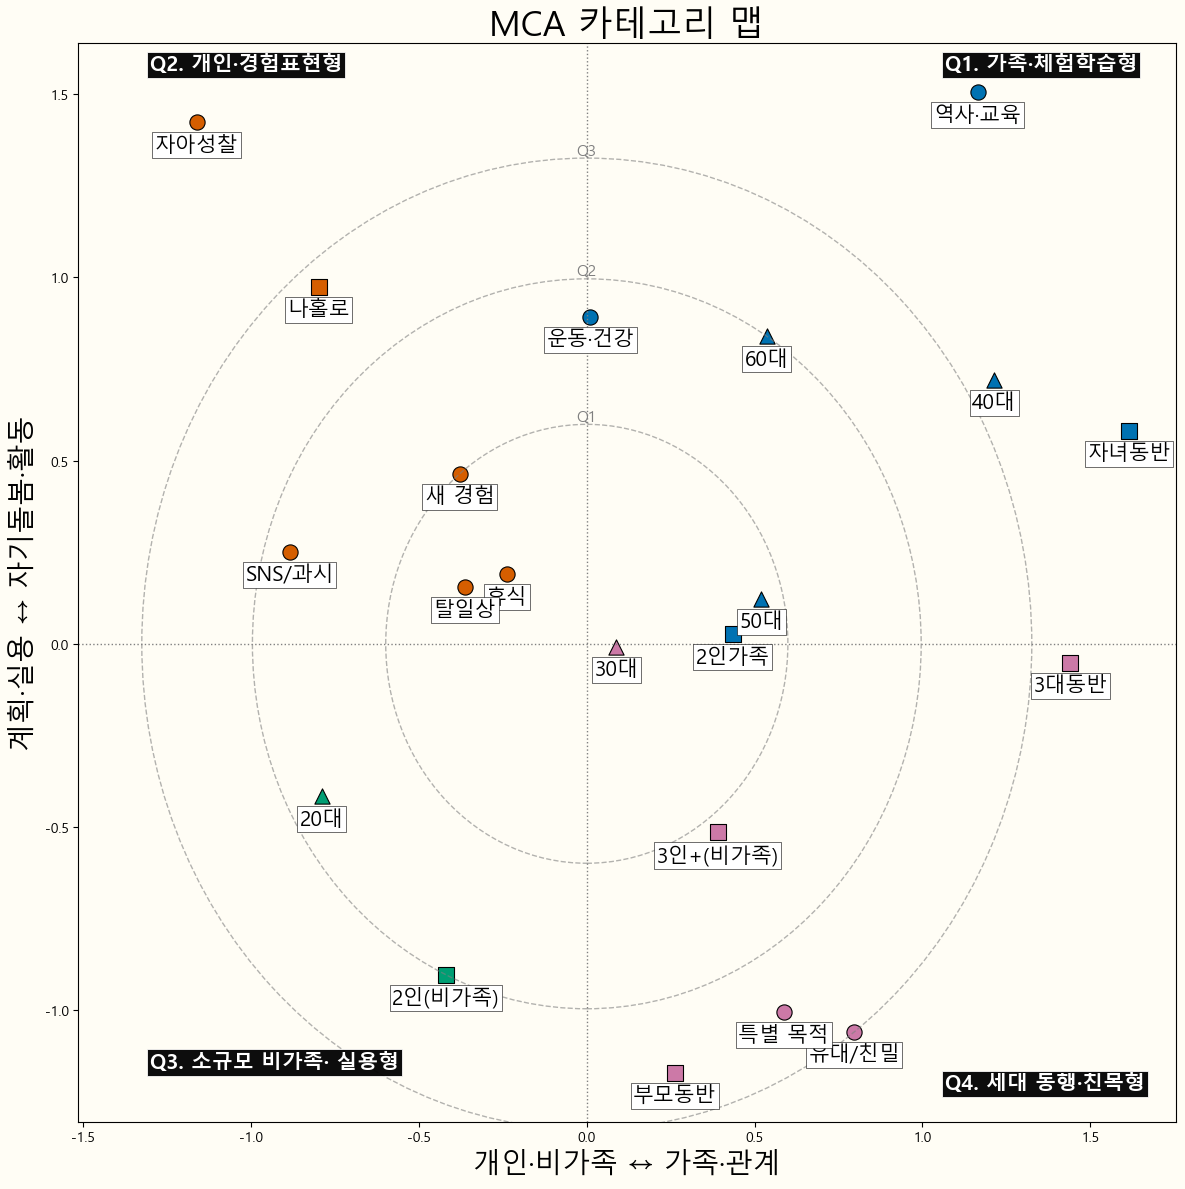

In [37]:
cat_cols = ['여행동기1','여행동행_유형','연령대']
X = trav_mas_df[cat_cols].dropna().copy()

# 연령대 순서(10,20,30…)
def _age_sort_key(s):
    m = re.findall(r'\d+', str(s))
    return int(m[0]) if m else 0
age_order = sorted(X['연령대'].astype(str).unique(), key=_age_sort_key)
X['연령대'] = X['연령대'].astype(str)
X['연령대'] = pd.Categorical(X['연령대'], categories=age_order, ordered=True)

for c in cat_cols:
    X[c] = X[c].astype('category')

# -----------------------------
# 1) MCA 적합 (2축)
# -----------------------------
mca = prince.MCA(n_components=2, n_iter=5, random_state=42).fit(X)

# 카테고리(모달리티) 좌표/기여도
mods  = mca.column_coordinates(X)   # index: '변수__값' 형식
contr = mca.column_contributions_
expl  = getattr(mca, 'eigenvalues_summary', None)

# -----------------------------
# 2) 좌표/스코어/사분면 계산
# -----------------------------
x = mods.iloc[:,0].values
y = mods.iloc[:,1].values
labels = mods.index.to_numpy()
dist = np.hypot(x, y)
dmax = dist.max() if dist.max() > 0 else 1.0

# 중요도 점수: |좌표| × (기여도 F1+F2)
score = (np.abs(x) + np.abs(y)) * (contr.iloc[:,0].fillna(0).values + contr.iloc[:,1].fillna(0).values)

# 사분면(1:+/+, 2:-/+, 3:-/-, 4:+/-)
quad = np.where((x>=0)&(y>=0), 1,
        np.where((x<0)&(y>=0), 2,
        np.where((x<0)&(y<0), 3, 4)))

# 거리 사분위 (동심원 그릴 때 사용)
q1, q2, q3 = np.quantile(dist, [0.25, 0.50, 0.75])

# -----------------------------
# 3) 라벨 요약(alias) & 사분면별 Top-N 선택
# -----------------------------
alias = {
    '여행동기1__여행 동반자와의 친밀감 및 유대감 증진': '유대/친밀',
    '여행동기1__역사 탐방, 문화적 경험 등 교육적 동기': '역사·교육',
    '여행동기1__특별한 목적(칠순여행, 신혼여행, 수학여행, 인센티브여행)': '특별 목적',
    '여행동기1__쉴 수 있는 기회, 육체 피로 해결 및 정신적인 휴식': '휴식',
    '여행동기1__일상적인 환경 및 역할에서의 탈출, 지루함 탈피': '탈일상',
    '여행동기1__운동, 건강 증진 및 충전': '운동·건강',
    '여행동기1__진정한 자아 찾기 또는 자신을 되돌아볼 기회 찾기': '자아성찰',
    '여행동기1__SNS 사진 등록 등 과시': 'SNS/과시',
    '여행동기1__새로운 경험 추구': '새 경험',
    '여행동행_유형__나홀로 여행': '나홀로',
    '여행동행_유형__2인 여행(가족 외)': '2인(비가족)',
    '여행동행_유형__2인 가족 여행': '2인가족',
    '여행동행_유형__3인 이상 여행(가족 외)': '3인+(비가족)',
    '여행동행_유형__자녀 동반 여행': '자녀동반',
    '여행동행_유형__부모 동반 여행': '부모동반',
    '여행동행_유형__3대 동반 여행(친척 포함)': '3대동반',
    '연령대__20':'20대','연령대__30':'30대','연령대__40':'40대','연령대__50':'50대','연령대__60':'60대',
}
def short_label(name, maxlen=8):
    lab = alias.get(name, name.split('__')[-1])
    return (lab[:maxlen] + '…') if len(lab) > maxlen else lab

topN = 8  # 사분면당 라벨 개수
keep = np.zeros(len(labels), dtype=bool)
for q in [1,2,3,4]:
    idx = np.where(quad==q)[0]
    if idx.size:
        top_idx = idx[np.argsort(score[idx])[-topN:]]
        keep[top_idx] = True

# -----------------------------
# 4) 시각화 (진한 색, 큰 점, 레이블 최소화)
# -----------------------------
# 강한 팔레트 & 완전 불투명
colors = {
    1: '#0072B2',  # 선명 블루
    2: '#D55E00',  # 버밀리온(진한 오렌지)
    3: '#009E73',  # 청록 그린
    4: '#CC79A7',  # 마젠타 퍼플
}
POINT_SIZE = 120    # 점 크기 (크면 72~80)
ALPHA      = 1.00  # 완전 불투명

fig, ax = plt.subplots(figsize=(12,12))
fig.patch.set_facecolor('#FFFDF5')   # 전체 그림 배경
ax.set_facecolor('#FFFDF5')          # 좌표 영역 배경
# 사분면별 산점
# 라벨 앞부분으로 타입 구분
kinds = np.array([ '동기' if s.startswith('여행동기1__')
                   else '동행' if s.startswith('여행동행_유형__')
                   else '연령' for s in labels ])
markers = {'동기':'o', '동행':'s', '연령':'^'}  # 원/사각/삼각

for q in [1,2,3,4]:
    m = (quad==q)
    for kind in ['동기','동행','연령']:
        mk = m & (kinds==kind)
        ax.scatter(x[mk], y[mk], s=POINT_SIZE, c=colors[q],
                   alpha=ALPHA, edgecolors='black', linewidths=0.8,
                   marker=markers[kind])

offset = int(0.7 * np.sqrt(POINT_SIZE) + 2)  # POINT_SIZE가 scatter의 s 값(pts^2)

for xi, yi, name, k in zip(x, y, labels, keep):
    if not k:
        continue
    ax.annotate(
        short_label(name, maxlen=8),
        xy=(xi, yi),                 # 점 위치
        xytext=(0, -offset),         # 아래로 offset 포인트 만큼
        textcoords='offset points',  # 좌표계: 포인트 단위 오프셋
        ha='center', va='top',       # 텍스트의 위쪽이 기준점에 오게
        bbox=dict(facecolor='white', alpha=1,
                  edgecolor='black', linewidth=0.4, pad=1.8),
        zorder=3,
        fontsize=15
    )
# 보조선 & 거리 사분위 원
ax.axhline(0, ls=':', color='gray', lw=1)
ax.axvline(0, ls=':', color='gray', lw=1)
for rr, nm in zip([q1, q2, q3], ['Q1', 'Q2', 'Q3']):
    circ = plt.Circle((0, 0), rr, fill=False, ls='--', lw=1, color='gray', alpha=0.6)
    ax.add_patch(circ)
    # 원 상단 중앙에 라벨 배치
    ax.text(0, rr, nm, ha='center', va='bottom', fontsize=11, color='gray')

# 축 라벨/제목/범례
ax.set_xlabel('개인·비가족 ↔ 가족·관계',fontsize=20)
ax.set_ylabel('계획·실용 ↔ 자기돌봄·활동',fontsize=20)
ax.set_title('MCA 카테고리 맵', fontsize = 25)
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()

# 좌측으로 20~30% 정도 확장
ax.set_xlim(xmin - (xmax - xmin) * 0.07, xmax)

# 2) 사분면 요약 박스(텍스트는 원하는 대로 수정)
quad_notes = {
    1: 'Q1. 가족·체험학습형',
    2: 'Q2. 개인·경험표현형',
    3: 'Q3. 소규모 비가족· 실용형',
    4: 'Q4. 세대 동행·친목형',
}
def at(relx, rely):  # 플롯 좌표계 기준 상대 위치 -> 실제 좌표
    return xmin + relx*(xmax-xmin), ymin + rely*(ymax-ymin)

pos = {1:(0.775,0.975), 2:(0,0.975), 3:(0,0.05), 4:(0.775,0.03)}
for q,(rx,ry) in pos.items():
    ax.text(*at(rx,ry), quad_notes[q],
        color='white', fontsize=15, fontweight='bold',
        bbox=dict(facecolor='black', alpha=0.95, edgecolor='white', linewidth=0.6, pad=2))

plt.tight_layout()
# plt.savefig('mca_category_map.png', dpi=200, bbox_inches='tight')  # 저장 원하면 주석 해제
plt.show()

# 타겟층 광고 요약

| 타겟층                | 대상                  | 광고문구           | 패키지 제안          | 광고 채널          |
| ------------------ | ------------------- | -------------- | --------------- | -------------- |
| **Q1 가족 체험·학습형**   | 40·60대 자녀동반 가족      | 아이와 배우는 하루     | 가족 번들(입장·체험·포토) | 네이버·카카오 패밀리 타겟 |
| **Q2 솔로 경험·표현형**   | 20–30대 1인 여행        | 나만의 하루 플랜      | 1인 전용 · 워크숍 크레딧 | 인스타·틱톡 UGC     |
| **Q3 소규모·비가족 실용형** | 20대 2–3인 비가족        | 친구랑 가성비 끝판왕    | 교통+숙소 번들 · 타임세일 | 대학 커뮤니티 · 가격비교 |
| **Q4 세대 동행·친목형**   | 30–50대 결제자(부모·기념여행) | 부담 없이 모시는 효도여행 | 차량 픽업 · 기념사진 포함 | 네이버 검색(효도/기념)  |

